## Notebook 2 
This notebook performs the analysis on the knowledge base that was create in Notebook 1 and also performs the test on a given dataset.

### Initialization

In [1]:
import pandas as pd
import os
from metafeatures import Meta
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from metafeatures import Meta
from deap import base
from deap import creator, tools
from scipy.stats import spearmanr
from cvi import Validation
from sklearn.preprocessing import OrdinalEncoder
import glob
from scipy.io import arff
import pandas as pd
from cvi import Validation
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from itertools import combinations
from scipy.spatial import distance
import math
import numpy as np
from sklearn.cluster import SpectralClustering
import numpy as np
import warnings
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from sklearn.metrics import normalized_mutual_info_score, davies_bouldin_score
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

### Importing data

In [4]:
#Importing all the datasets created during knowledge base creation
df1=pd.read_csv('transformation_2_kmeans_median.csv')
df2=pd.read_csv('transformation_2_agglo_median.csv')
df3=pd.read_csv('transformation_2_kmeans_mean.csv')
df4=pd.read_csv('transformation_2_agglo_mean.csv')

df5=pd.read_csv('transformation_2_agglo.csv')
df6=pd.read_csv('transformation_2_kmeans.csv')

df7=pd.read_csv('transformation_1_agglo.csv')
df8=pd.read_csv('transformation_1_kmeans.csv')
df8=pd.read_csv('transformation_1_birch.csv')

df9=pd.read_csv('transformation_agglo_mean.csv')
df10=pd.read_csv('transformation_kmeans_mean.csv')
df11=pd.read_csv('transformation_birch_mean.csv')

df12=pd.read_csv('transformation_agglo_median.csv')
df13=pd.read_csv('transformation_kmeans_median.csv')
df14=pd.read_csv('transformation_birch_median.csv')

df15=pd.read_csv('meta_feature_original_data_CVI.csv')

#Concatenate all of them
pdList = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]  # List of your dataframes
new_df = pd.concat(pdList,ignore_index=True)
#print(new_df.columns)
new_df.to_csv('meta_data.csv')

### Analysis
Checking which transformation performed best and also if transformation played a role. 

<AxesSubplot:>

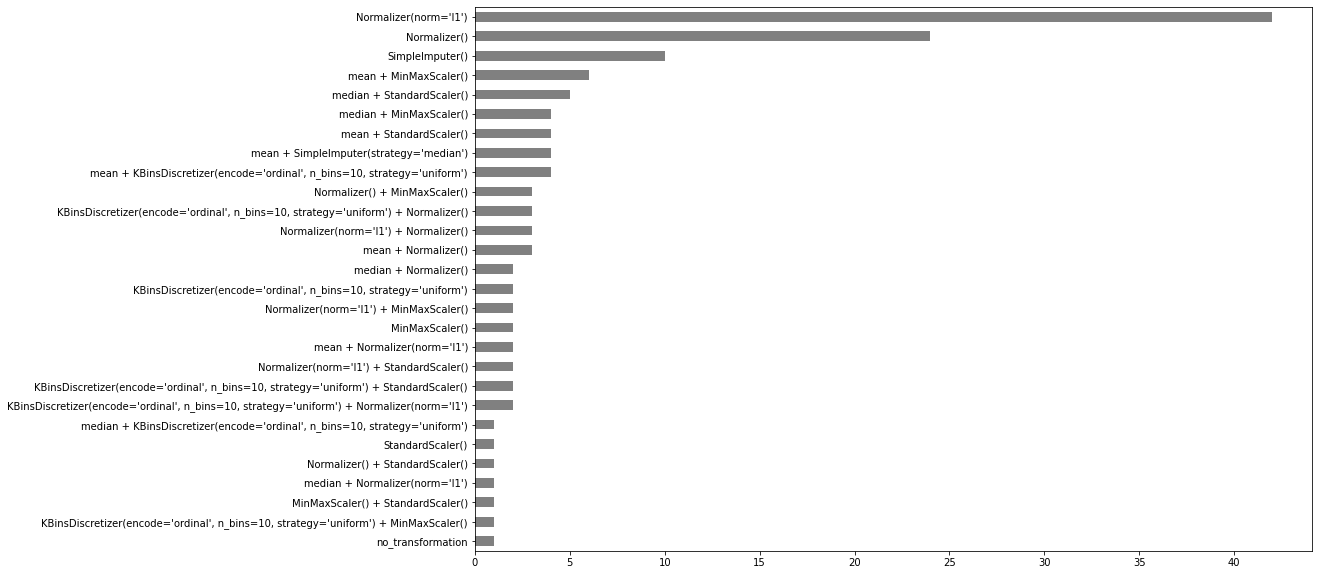

In [256]:
idx = new_df.groupby(['name'])['multi_cvi_correlation_score'].transform(max) == new_df['multi_cvi_correlation_score']
new_df[idx]['transformation'].value_counts().sort_values().plot(kind = 'barh', figsize=(15,10), color='grey')

In [5]:
#not required
"""
high_cvi=new_df[idx].sort_values(by='multi_cvi_correlation_score').drop_duplicates(subset=['name'],keep='first')
no_cvi=new_df[new_df['transformation']=='no_transformation']
no_cvi=no_cvi[['name', 'best_cluster_setting', 'transformation', 'multi_cvi_correlation_score']]
high_cvi=high_cvi[['name', 'best_cluster_setting', 'transformation', 'multi_cvi_correlation_score']]



def latex_with_lines(df, *args, **kwargs):
    kwargs['column_format'] = '|'.join([''] + ['l'] * df.index.nlevels
                                            + ['r'] * df.shape[1] + [''])
    res = df.to_latex(*args, **kwargs, index=False)
    return res.replace('\\\\\n', '\\\\ \\hline\n')


merged=pd.merge(high_cvi, no_cvi,  how='left', left_on=['name'], right_on = ['name'])
#merged.to_latex(index=False)
merged=merged[['name', 'multi_cvi_correlation_score_x', 'multi_cvi_correlation_score_y']]
merged.columns=['Dataset', 'score_with_tr', 'score_without_tr']
#print(merged.to_latex(index=False))

print(latex_with_lines(merged))
"""

"\nhigh_cvi=new_df[idx].sort_values(by='multi_cvi_correlation_score').drop_duplicates(subset=['name'],keep='first')\nno_cvi=new_df[new_df['transformation']=='no_transformation']\nno_cvi=no_cvi[['name', 'best_cluster_setting', 'transformation', 'multi_cvi_correlation_score']]\nhigh_cvi=high_cvi[['name', 'best_cluster_setting', 'transformation', 'multi_cvi_correlation_score']]\n\n\n\ndef latex_with_lines(df, *args, **kwargs):\n    kwargs['column_format'] = '|'.join([''] + ['l'] * df.index.nlevels\n                                            + ['r'] * df.shape[1] + [''])\n    res = df.to_latex(*args, **kwargs, index=False)\n    return res.replace('\\\\\n', '\\\\ \\hline\n')\n\n\nmerged=pd.merge(high_cvi, no_cvi,  how='left', left_on=['name'], right_on = ['name'])\n#merged.to_latex(index=False)\nmerged=merged[['name', 'multi_cvi_correlation_score_x', 'multi_cvi_correlation_score_y']]\nmerged.columns=['Dataset', 'score_with_tr', 'score_without_tr']\n#print(merged.to_latex(index=False))\n\np

,Algorithms,count
2,KMeans,24
0,Agglomerative,50
1,Birch,64


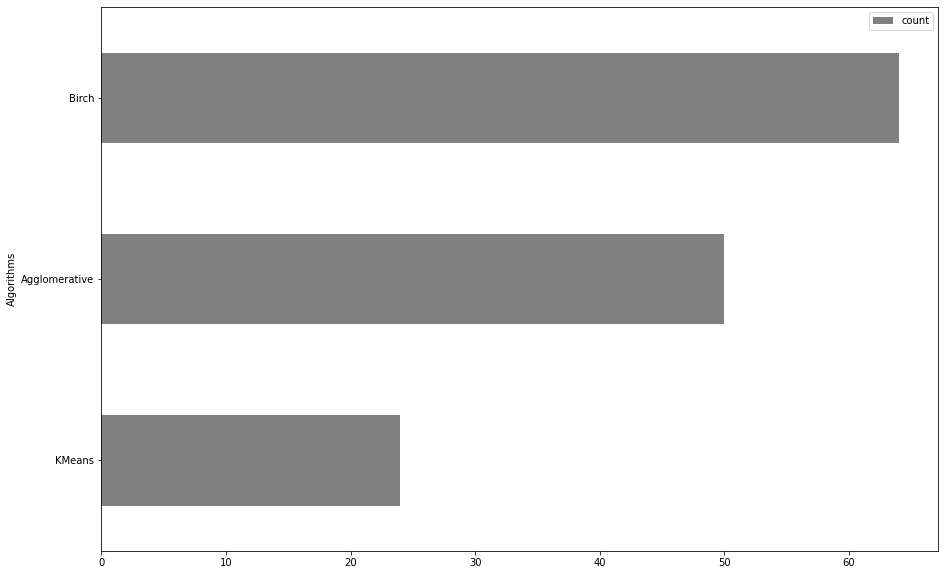

In [11]:
#checking which algorithm performed best
idx = new_df.groupby(['name'])['multi_cvi_correlation_score'].transform(max) == new_df['multi_cvi_correlation_score']
cluster=new_df[idx]['best_cluster_setting'].value_counts().reset_index()
cluster['name']='0'
cluster['name']=pd.np.where(cluster['index'].str.contains("Birch"), "Birch",
                   pd.np.where(cluster['index'].str.contains("Agglo"), "Agglomerative",
                   pd.np.where(cluster['index'].str.contains("KMeans"), "KMeans", "none")))
#cluster['name'].value_counts().sort_values().plot(kind = 'barh', figsize=(15,10), color='grey')
cl_2=cluster.groupby('name').sum().reset_index()
cl_2=cl_2.rename(columns={'name': 'Algorithms', 'best_cluster_setting': 'count'})

cl_2=cl_2.sort_values(by='count', ascending=True)
cl_2.plot(kind='barh', x='Algorithms', y='count', color='grey', figsize=(15,10))
cl_2

In [12]:
new_df.columns
new_df=new_df[['name', 'instances', 'attributtes',
       'classes', 'cat_att', 'cont_att', 'mean', 'sd', 'var', 'kurtosis',
       'skewness', 'MD6', 'MD7', 'MD8', 'MD9', 'MD10', 'MD11', 'MD12', 'MD13',
       'MD14', 'MD15', 'MD16', 'MD17', 'MD18', 'MD19', 'dataset',
       'best_cluster_setting', 'transformation', 'multi_cvi',
       'multi_cvi_correlation_score']]

new_df_2=new_df[['mean', 'sd', 'var', 'kurtosis',
       'skewness', 'MD6', 'MD16', 'MD17', 'MD18']]


# some test, could be avoided. 
data = pd.read_csv("csmartml/datasets/zelnik6.csv", na_values='?')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Distance-based metafeatures
df_metafeatures = new_df_2
df_metafeatures.head()

data

In [364]:
"""
    Extract meta-features from dataset for testing and suggestion of preprocessing pipeline
"""

print(os.getcwd())

test_df=pd.read_csv('/Users/hasan.tanvir/Documents/Thesis/dataset for test 2/aggregation.csv', encoding="utf-8-sig")
#print(test_df)
#test_df.columns=['f1', 'f2','f3', 'f4',  'class']
X_meta_org = Meta("/Users/hasan.tanvir/Documents/Thesis/datasets for test/glass.csv").extract_metafeatures(meta_type="distance")
X_meta=X_meta_org[['mean', 'sd', 'var', 'kurtosis',
       'skewness', 'MD6', 'MD16', 'MD17', 'MD18']]

test_df['class'].nunique()

samples = df_metafeatures.iloc[:,:-1].to_numpy()
query = X_meta.iloc[:,:-1].to_numpy()

neigh = NearestNeighbors(n_neighbors=505, metric='euclidean')
neigh.fit(samples)

nn = neigh.kneighbors(query, 51, return_distance=False)

#this will show the pipeline that worked best for the nearest dataset
datasets = new_df[new_df.index.isin(nn.tolist()[0])]["name"].values.tolist()
datasets[0]
new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]



/Users/hasan.tanvir/Documents/Thesis/code


7

In [645]:
"""
    This part tries to predict the multi CVI score and caluclate the MAE. Did not use this in thesis. 
    Could be avoided. 
"""
new_df['attributtes']=pd.to_numeric(new_df['attributtes'])
new_df['instances']=pd.to_numeric(new_df['instances'])
new_df['classes']=pd.to_numeric(new_df['classes'])
new_df['cat_att']=pd.to_numeric(new_df['cat_att'])
new_df['cont_att']=pd.to_numeric(new_df['cont_att'])





X=new_df[new_df.columns.difference(['multi_cvi_correlation_score', 'MD8', 'MD9', 'MD10', 'MD11', 'MD12', 'MD13', 'MD14', 'MD15', 'MD19', 'dataset', 'name', 'multi_cvi'])]
y=new_df['multi_cvi_correlation_score']
print(X.columns)
X=pd.get_dummies(X)


#
X=X.fillna(0)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

y_pred=reg.predict(X_test)

mean_absolute_error(y_test, y_pred, multioutput='raw_values')

Index(['MD16', 'MD17', 'MD18', 'MD6', 'MD7', 'attributtes',
       'best_cluster_setting', 'cat_att', 'classes', 'cont_att', 'instances',
       'kurtosis', 'mean', 'sd', 'skewness', 'transformation', 'var'],
      dtype='object')


In [6]:
"""
    not required

X_meta_org['best_cluster_setting']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['best_cluster_setting']
X_meta_org['transformation']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['transformation']
cat_cols=test_df.iloc[:, :-1].columns
cat_num_cols = test_df.iloc[:, :-1]._get_numeric_data().columns

num_cols = test_df._get_numeric_data().columns

X_meta_org['instances']=test_df.shape[0]
X_meta_org['attributtes']=test_df.shape[1]-1
X_meta_org['classes']=test_df['class'].nunique()

X_meta_org['cat_att']=len(list(set(cat_cols) - set(cat_num_cols)))
X_meta_org['cont_att']=len(num_cols)

print(len(X_meta_org.columns))
X_meta_org=X_meta_org[['MD16', 'MD17', 'MD18', 'MD6', 'MD7', 'attributtes',
       'best_cluster_setting', 'cat_att', 'classes', 'cont_att', 'instances',
       'kurtosis', 'mean',  'sd', 'skewness',
       'transformation', 'var']]
X_meta_org

"""

"\n    not required\n\nX_meta_org['best_cluster_setting']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['best_cluster_setting']\nX_meta_org['transformation']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['transformation']\ncat_cols=test_df.iloc[:, :-1].columns\ncat_num_cols = test_df.iloc[:, :-1]._get_numeric_data().columns\n\nnum_cols = test_df._get_numeric_data().columns\n\nX_meta_org['instances']=test_df.shape[0]\nX_meta_org['attributtes']=test_df.shape[1]-1\nX_meta_org['classes']=test_df['class'].nunique()\n\nX_meta_org['cat_att']=len(list(set(cat_cols) - set(cat_num_cols)))\nX_meta_org['cont_att']=len(num_cols)\n\nprint(len(X_meta_org.columns))\nX_meta_org=X_meta_org[['MD16', 'MD17', 'MD18', 'MD6', 'MD7', 'attributtes',\n       'best_cluster_setting', 'cat_att', 'classes', 'cont_att', 'instances',\n       'kurtosis', 'mean',  'sd', 'skewness',\n       'tran

In [8]:
"""
not required
cols=new_df.columns.to_list()
X_meta_org=X_meta_org[['MD16', 'MD17', 'MD18', 'MD6', 'MD7', 'attributtes',
       'best_cluster_setting', 'cat_att', 'classes', 'cont_att', 'instances',
       'kurtosis', 'mean', 'sd', 'skewness', 'transformation', 'var']]

#X_meta_org['multi_cvi']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['multi_cvi']

#X_meta_org=X_meta_org[X_meta_org.columns.difference(['multi_cvi_correlation_score', 'MD8', 'MD9', 'MD10', 'MD11', 'MD12', 'MD13', 'MD14', 'MD15', 'MD19', 'dataset'])]
X_meta_org
X_meta_org.fillna(0)
#y_pred=reg.predict(pd.get_dummies(X_meta_org))

X_meta_org[list(set(X_train.columns.to_list())-set(X_meta_org.columns.to_list()))]=0
X_meta_org=X_meta_org[X_meta_org.columns.difference(['best_cluster_setting', 'transformation'])]

X_meta_org
y_pred=reg.predict(X_meta_org)
y_pred
"""


"\nnot required\ncols=new_df.columns.to_list()\nX_meta_org=X_meta_org[['MD16', 'MD17', 'MD18', 'MD6', 'MD7', 'attributtes',\n       'best_cluster_setting', 'cat_att', 'classes', 'cont_att', 'instances',\n       'kurtosis', 'mean', 'sd', 'skewness', 'transformation', 'var']]\n\n#X_meta_org['multi_cvi']=new_df[new_df['name']==datasets[0]].sort_values(by=['multi_cvi_correlation_score'], ascending=False).iloc[0]['multi_cvi']\n\n#X_meta_org=X_meta_org[X_meta_org.columns.difference(['multi_cvi_correlation_score', 'MD8', 'MD9', 'MD10', 'MD11', 'MD12', 'MD13', 'MD14', 'MD15', 'MD19', 'dataset'])]\nX_meta_org\nX_meta_org.fillna(0)\n#y_pred=reg.predict(pd.get_dummies(X_meta_org))\n\nX_meta_org[list(set(X_train.columns.to_list())-set(X_meta_org.columns.to_list()))]=0\nX_meta_org=X_meta_org[X_meta_org.columns.difference(['best_cluster_setting', 'transformation'])]\n\nX_meta_org\n"

### Further testing
calculating the multi CVI when the pipeline is applied and also for comparison. This part is similar to notebook 1.

In [23]:
  def i_index(data, class_label):
      """
        The I index, a measure of compactness.
      """
      
      normClusterSum = 0
      normDatasetSum = 0
      list_centers = []

      data_matrix = np.asmatrix(data).astype(np.float)
      # compute the number of clusters and attribute
      attributes = len(data_matrix[0])
      numCluster = max(class_label) + 1
      # compute the center of the dataset
      dataCenter = np.mean(data_matrix, 0)
      # iterate through all the clusters
      for i in range(numCluster):
          indices = [t for t, x in enumerate(class_label) if x == i]
          clusterMember = data_matrix[indices, :]
          # compute the center of the cluster
          clusterCenter = np.mean(clusterMember, 0)
          list_centers.append(np.asarray(clusterCenter))
          # compute the norm for every member in the cluster with cluster center and dataset center
          for member in clusterMember:
              normClusterSum += distance.euclidean(member, clusterCenter)
              normDatasetSum += distance.euclidean(member, dataCenter)
      # compute the max distance between cluster centers
      list_centers = np.concatenate(list_centers, axis=0)
      maxCenterDis = max(distance.pdist(list_centers))
      
      # compute the fitness      
      return math.pow(((normDatasetSum * maxCenterDis) / (normClusterSum * numCluster)), attributes)
    
#i_index(df.loc[:, df.columns != 'class'].values, df['class'].values)





def banfeld_raferty(data, class_label):
    """ Banfeld-Raferty index is the weighted sum of the logarithms
         of the traces of the variance-covariance matrix of each cluster
         
        Weighted sum of the logarithms of the traces of the variance-covariance matrix of each cluster
        
        OBJECTIVE: MIN
    """

    sum_total = 0
    num_cluster = max(class_label) + 1
    data_matrix = np.asmatrix(data).astype(np.float)
    
    # iterate through all the clusters
    for i in range(num_cluster):
        sum_dis = 0
        indices = [t for t, x in enumerate(class_label) if x == i]
        cluster_member = data_matrix[indices, :]

        # compute the center of the cluster
        cluster_center = np.mean(cluster_member, 0)

        # iterate through all the members
        for member in cluster_member:
            sum_dis += distance.euclidean(member, cluster_center) ** 2

        op = sum_dis / len(indices)
        if op <= 0:
            # Cannot calculate Banfeld_Raferty, due to an undefined value
            continue
        else:
            sum_total += len(indices) * math.log(sum_dis / len(indices))

    return sum_total
"""
    Generates different cluster configurations from the Agglomerated Clustering algorithm, 
    modifying hyper-parameters: n_clusters, distance_threshold
"""

configs = list()

#Agglo
for i in np.arange(7, 11, 1):
    configs.append(SpectralClustering( n_clusters=i))

#for j in np.arange(0.5, 1.5, 0.5):
#    configs.append(AgglomerativeClustering(distance_threshold=j, n_clusters=None))
   

"""
##K-Means
for i in list(range(100, 101,1)):
    #configs.append(AgglomerativeClustering(n_clusters=i))

    for j in list(range(10, 18,1)):
        configs.append(KMeans(n_clusters=j, max_iter=i))
        
#Birch
for i in np.arange(6, 7, 1):
    configs.append(Birch( n_clusters=i))
"""  

len(configs)
#configs
#AgglomerativeClustering(distance_threshold=0.5, n_clusters=4)
#configs
#del configs[1:2]
len(configs)
#configs

In [372]:


df_meta=pd.DataFrame(columns=['name', 'best_cluster_setting', 'transformation','multi_cvi', 'multi_cvi_correlation_score'])



kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
norm_l1=Normalizer(norm='l1')
norm_l2=Normalizer(norm='l2')
std_zscore=StandardScaler()
scaling_minmax=MinMaxScaler()
replacing_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
replacing_median=SimpleImputer(missing_values=np.nan, strategy='median')

transformations = [kbin, norm_l1, norm_l2, scaling_minmax, std_zscore]#, replacing_mean, replacing_median]
#transformations = ['replacing_median']
files=glob.glob(r"/Users/hasan.tanvir/Documents/Thesis/dataset for test 2/aggregation.csv")
print(len(files))

for t in transformations:
    #print(t)
    #print(transformations[t[0]])
    #print(transformations[t[1]])
    
#configs = list()
    for file in files:
        print(file)

        #if file not in 'water-':
        #data = arff.loadarff(file)
        df = pd.read_csv(file)
        #df.columns=['f1', 'f2','f3', 'f4', 'f5', 'f6','f7', 'f8', 'f9', 'f10', 'class']

        #print(df)
        
        df=df.iloc[: , 1:]
        df.columns = [x.lower() for x in df.columns]
        cols=df.columns
        num_cols = df._get_numeric_data().columns
        #df=df.dropna() 


        #for col in df.columns:
         #   df.loc[df.sample(frac=0.2).index, col] = np.nan 

        #df.apply(lambda x: x.fillna(x.median(), inplace=True),axis=0)

        #df.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=0)

        X=df[df.columns.difference(['class'])].values
        y=df['class'].values
        #print(y)


        #df=df.dropna() 
        #print(X)
        X=t.fit_transform(X)
        #X=std_zscore.fit_transform(X)
        #X=transformations[t[1]].fit_transform(X)
        #X[X == 0] = X.max()+1
        #print(X)



        #print(X,y)

        def fitness_function(individual):
            clustering = individual[0].fit(X)
            #print(individual[0])
            labels = clustering.labels_

            #if len(set(labels))==1:
                #return 0
            #print('clus',set(labels))
            #print(labels)
            #print('X', len(X))
            
            return i_index(X, labels), Validation(X, df.values,labels).modified_hubert_t(), banfeld_raferty(X, labels)

        def initIndividual(icls, content):
            return icls([content])

        def initPopulation(pcls, ind_init, poplist):
            return pcls(ind_init(c) for c in poplist)

        # Think of creator as an abstraction for classes that can be modified for evolutionary algorithms.
        # Eg. in this case is the base Fitness class
        # weights = tuple defining objective of CVI, max: 1 or min: -1
        creator.create("FitnessMulti", base.Fitness, weights=(1.0, 1.0, -1.0)) 
        creator.create("Individual", list, fitness=creator.FitnessMulti)

        # Toolbox contains specific functions for evolutionary operations
        # Read more: https://deap.readthedocs.io/en/master/api/base.html?highlight=toolbox#toolbox
        toolbox = base.Toolbox()
        toolbox.register("individual", initIndividual, creator.Individual)
        toolbox.register("population", initPopulation, list, toolbox.individual, configs)
        toolbox.register("evaluate", fitness_function)
        toolbox.register("select", tools.selNSGA2)

        """
            Rank configuration by multiple CVIs
        """
        pop = toolbox.population()

        pop_dict = {} # Numbering configurations so it's easy to compare their ranks
        for i, j in enumerate(pop):
            pop_dict[i] = j

        invalid_ind = [ind for ind in pop if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
            
            
        #Fix valueeeeeeeeeeee
        nsga_sorted = toolbox.select(pop,4)
        multi_cvi_rank = [list(pop_dict.values()).index(i) for i in nsga_sorted]
        multi_cvi_rank
        #print(pop_dict[multi_cvi_rank[0]])
        #print(multi_cvi_rank[0])


    #CVI part



        cvi_1_dict = {}
        cvi_2_dict = {}
        cvi_3_dict = {}

        for k, v in pop_dict.items():
            clustering = v[0].fit(X)

            cvi_1_dict[k] = Validation(X, X, clustering.labels_).s_dbw()
            cvi_2_dict[k] = davies_bouldin_score(X, clustering.labels_)
            cvi_3_dict[k] = banfeld_raferty(X, clustering.labels_)

        cvi_1_dict = dict(sorted(cvi_1_dict.items(), key=lambda item: item[1], reverse=False))
        cvi_2_dict = dict(sorted(cvi_2_dict.items(), key=lambda item: item[1], reverse=False))
        cvi_3_dict = dict(sorted(cvi_3_dict.items(), key=lambda item: item[1], reverse=False))

        cvi_1_rank = list(cvi_1_dict.keys())
        cvi_2_rank = list(cvi_2_dict.keys())
        cvi_3_rank = list(cvi_3_dict.keys())


        # Rank configurations by external CVI (NMI) 

        ground_truth_dict = {}
        for k, v in pop_dict.items():
            clustering = v[0].fit(X)
            ground_truth_dict[k] = normalized_mutual_info_score(y, clustering.labels_)
            #print(ground_truth_dict)

        ground_truth_dict = dict(sorted(ground_truth_dict.items(), key=lambda item: item[1], reverse=True))
        gt_cvi_rank = list(ground_truth_dict.keys())
        #print(gt_cvi_rank)
        cvi_1_correlation = spearmanr(cvi_1_rank, gt_cvi_rank)
        cvi_2_correlation = spearmanr(cvi_2_rank, gt_cvi_rank)
        cvi_3_correlation = spearmanr(cvi_3_rank, gt_cvi_rank)
        multi_correlation = spearmanr(multi_cvi_rank, gt_cvi_rank)

        #print("Correlation with SDbw: ", cvi_1_correlation.correlation)
        #print("Correlation with Davies Bouldin Score: ", cvi_2_correlation.correlation)
        #print("Correlation with Banfeld Raferty: ", cvi_3_correlation.correlation)
        #print("Original NMI", gt_cvi_rank)
        #print("Correlation with multi CVI: ", multi_correlation.correlation)
        
        df_meta=df_meta.append({'name': file.split('/')[-1].split('.')[0], 
                             
                                'best_cluster_setting':pop_dict[multi_cvi_rank[0]],
                                'transformation':  str(t),
                                'multi_cvi':'I-INDEX & MODIFIED-HUBERT-T & BANFELD-RAFERTY',


                                'multi_cvi_correlation_score': multi_correlation.correlation}, ignore_index=True)





1
/Users/hasan.tanvir/Documents/Thesis/dataset for test 2/aggregation.csv
[SpectralClustering(n_clusters=7)]
0
{0: 0.9924322611740495}
{0: 0.9924322611740495, 1: 0.934860971632189}
{0: 0.9924322611740495, 1: 0.934860971632189, 2: 0.8992911794574219}
{0: 0.9924322611740495, 1: 0.934860971632189, 2: 0.8992911794574219, 3: 0.8492048144911308}
[0, 1, 2, 3]
Correlation with SDbw:  -0.19999999999999998
Correlation with Davies Bouldin Score:  1.0
Correlation with Banfeld Raferty:  -1.0
Correlation with multi CVI:  0.19999999999999998
/Users/hasan.tanvir/Documents/Thesis/dataset for test 2/aggregation.csv
[SpectralClustering(n_clusters=10)]
3
{0: 0.4280813775775099}
{0: 0.4280813775775099, 1: 0.42737964930181493}


ValueError: expected 1-d or 2-d array or matrix, got array(None, dtype=object)

In [373]:
df_meta
df_meta.to_csv('/Users/hasan.tanvir/Documents/Thesis/dataset for test 2/scores/aggregation_all_2.csv')
